In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
## read csv file
df = pd.read_csv('height_weight.csv')
df.head()

,Weight (kg),Height (cm)
0,68.73,88.06
1,97.54,99.62
2,86.60,92.72
3,79.93,88.46
4,57.80,71.51


In [3]:
df = df.rename({'Weight (kg)':'weight', 'Height (cm)':'height'}, axis=1)
df.head()

,weight,height
0,68.73,88.06
1,97.54,99.62
2,86.60,92.72
3,79.93,88.46
4,57.80,71.51


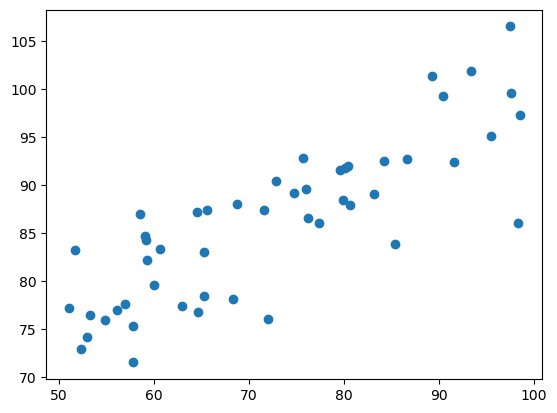

In [4]:
# Plot the datapoints
plt.scatter(df['weight'], df['height'])
plt.show()

In [5]:
## divide my dataset into dependent and independent features
X = df[['weight']] #independent feature
y = df['height'] #dependent feature

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

## Train Test Split

In [7]:
X_train.shape, X_test.shape

((40, 1), (10, 1))

In [8]:
y_train.shape, y_test.shape

((40,), (10,))

In [9]:
## standardize the train data
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [11]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

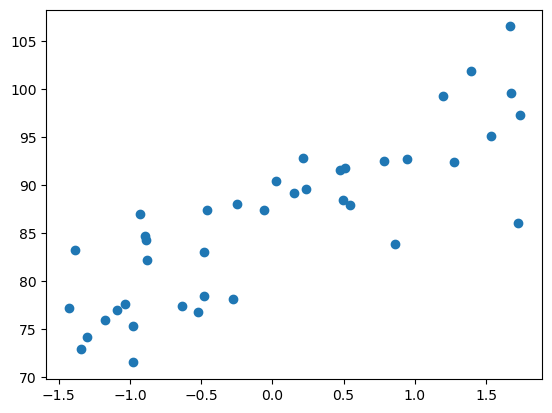

In [12]:
plt.scatter(X_train, y_train)

## Train the Simple Linear Regression Model

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lin = LinearRegression()

In [15]:
lin.fit(X_train,y_train)

LinearRegression()

In [17]:
print("The co-efficient of weight:",lin.coef_)
print("Intercept:",lin.intercept_)

The co-efficient of weight: [7.08518492]
Intercept: 86.22375


### Best fit line

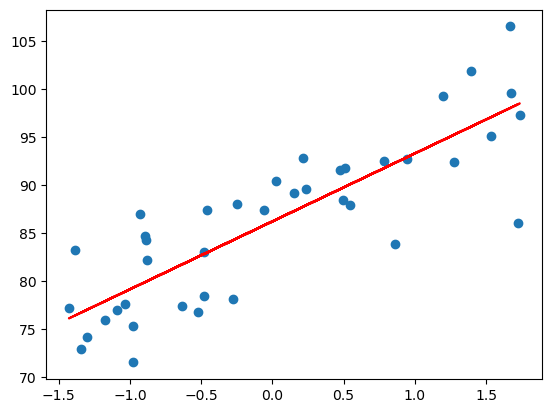

In [19]:
plt.scatter(X_train,y_train)
plt.plot(X_train,lin.predict(X_train),'r-')

### Prediction of train data
1. prediction height output = intercept + coef_(weight)
2. y_pred_train = 86.22375 + 7.08518492 (X_train)

### Prediction of test data
1. prediction height output = intercept + coef_(weight)
2. y_pred_test = 86.22375 + 7.08518492 (X_test)

In [20]:
y_pred_test = lin.predict(X_test)

In [21]:
y_pred_test, y_test

(array([80.63568638, 86.01545518, 89.96880591, 91.26769653, 88.01338511,
        88.53294136, 80.33339911, 94.1630418 , 77.15465952, 82.4966424 ]),
 13     83.37
 39     76.07
 30     92.00
 45     89.05
 17     86.57
 48     86.02
 26     79.63
 25    101.41
 32     76.45
 19     87.16
 Name: height, dtype: float64)

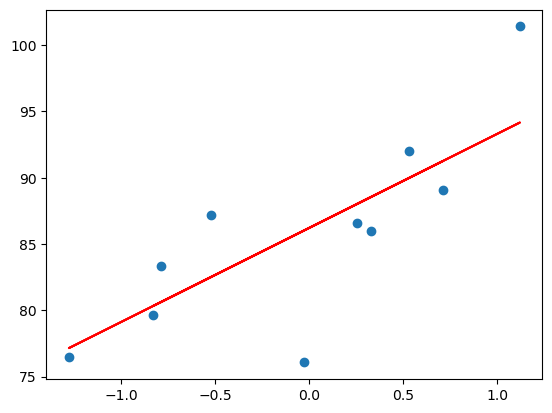

In [22]:
plt.scatter(X_test,y_test)
plt.plot(X_test, y_pred_test, 'r-')

## Performance Metrics
1. MSE, MAE, RMSE
2. R2 score and Adjusted R2

### R square and Adjusted R square

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [24]:
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print('MSE: ',mse)
print('MAE: ',mae)
print('RMSE: ',rmse)

MSE:  19.908733437854952
MAE:  3.420336031618713
RMSE:  4.461920375561957


In [25]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred_test)

In [26]:
score

0.6180413183210194

#### Adjusted R Square

1 - (1-R2) * (n-1)/(n-p-1)

In [27]:
# calculate adjusted r2

adj_r2 = 1 - (1-score) * (len(X_train)-1)/(len(X_train)-X_train.shape[1]-1)
adj_r2

0.6079897740663094

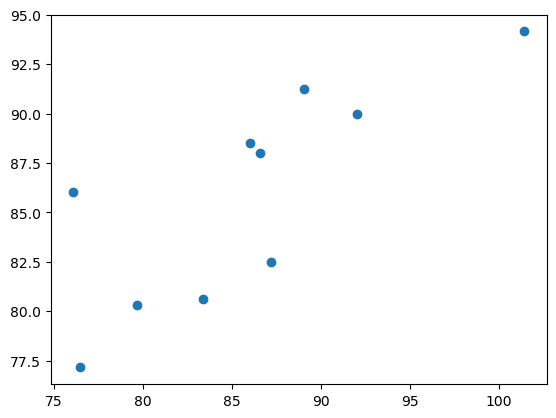

In [28]:
## Assumptions 
## plot a scatter plot

plt.scatter(y_test, y_pred_test)
plt.show()

In [29]:
## Residuals
residuals = y_test-y_pred_test
residuals

13    2.734314
39   -9.945455
30    2.031194
45   -2.217697
17   -1.443385
48   -2.512941
26   -0.703399
25    7.246958
32   -0.704660
19    4.663358
Name: height, dtype: float64

C:\Users\Vipina m\AppData\Local\Temp\ipykernel_17576\1516574785.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, kde=True)
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_n

<Axes: xlabel='height', ylabel='Density'>

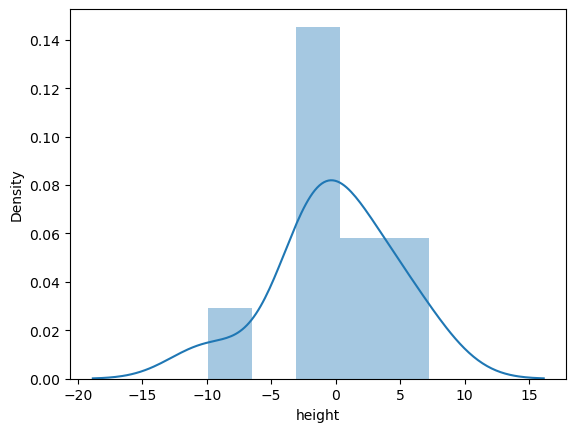

In [30]:
## plot residuals
sns.distplot(residuals, kde=True)

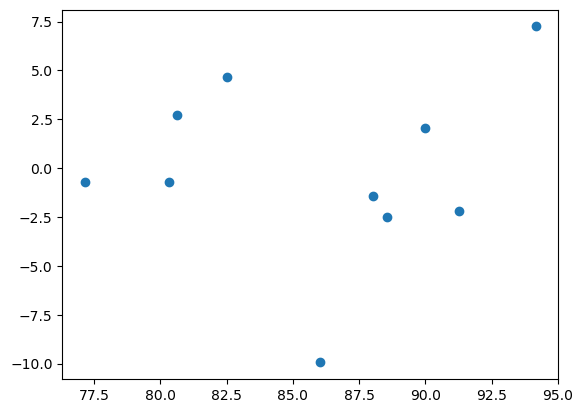

In [31]:
## plot residuals versus predictions

plt.scatter(y_pred_test,residuals)